# 데이터 및 필요 라이브러리 로드

In [12]:
!apt-get update -qq
!apt-get install fonts-nanum* --q
!sudo apt-get install -y fonts-nanum
!fc-cache -fv
!find / -name "NanumGothic.ttf" 2>/dev/null

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
E: Command line option --q is not understood in combination with the other options
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 52 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
fm.fontManager.addfont(path)
plt.rc('font', family='NanumGothic')

plt.rcParams['axes.unicode_minus'] = False

[f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]

['NanumGothic', 'NanumGothic']

In [14]:
df = pd.read_csv('./FDS - Trnasaction(Lat,Long).csv', encoding='utf-8')

In [15]:
df

,Unnamed: 0,trans_date_trans_time,Unnamed: 2,merchant,category,amt,first,last,city,lat,long,merch_lat,merch_long,is_fraud
0,0,2019.1.1 0:00,NaN,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,Moravian Falls,36.0788,-81.1781,36.011293,-82.048315,0
1,1,2019.1.1 0:00,NaN,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,Orient,48.8878,-118.2105,49.159047,-118.186462,0
2,2,2019.1.1 0:00,NaN,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,Malad City,42.1808,-112.2620,43.150704,-112.154481,0
3,3,2019.1.1 0:01,NaN,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,Boulder,46.2306,-112.1138,47.034331,-112.561071,0
4,4,2019.1.1 0:03,NaN,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,Doe Hill,38.4207,-79.4629,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,2020.3.10 16:07,NaN,fraud_Fadel Inc,health_fitness,77.00,Haley,Wagner,Annapolis,39.0305,-76.5515,38.779464,-76.317042,0
1048571,1048571,2020.3.10 16:07,NaN,"fraud_Cremin, Hamill and Reichel",misc_pos,116.94,Meredith,Campbell,Hedrick,41.1826,-92.3097,41.400318,-92.726724,0
1048572,1048572,2020.3.10 16:08,NaN,"fraud_O'Connell, Botsford and Hand",home,21.27,Susan,Mills,Louisville,38.2507,-85.7476,37.293339,-84.798122,0
1048573,1048573,2020.3.10 16:08,NaN,fraud_Thompson-Gleason,health_fitness,9.52,Julia,Bell,West Sayville,40.7320,-73.1000,39.773077,-72.213209,0


# 날씨 및 시간 데이터 처리

In [16]:
# 거래 날짜 및 시간 컬럼을 datetime 객체로 변환
df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])

# 기존 거래 날짜 및 시간 컬럼을 연도, 월, 일, 시간, 분, 초로 세분화 하여 컬럼 추출
df[['year', 'month', 'day', 'hour', 'minute', 'second']] = df['trans_date_trans_time'].apply(lambda x: pd.Series([x.year, x.month, x.day, x.hour, x.minute, x.second]))

# 요일 컬럼 추출 (0: 월요일 ~ 6: 일요일)
df['weekday'] = df['trans_date_trans_time'].dt.weekday

# 주말 여부 컬럼 생성 (1: 주말, 0: 평일)
df['weekend'] = df['weekday'].apply(lambda x: 1 if x >= 5 else 0)

df

,Unnamed: 0,trans_date_trans_time,Unnamed: 2,merchant,category,amt,first,last,city,lat,...,merch_long,is_fraud,year,month,day,hour,minute,second,weekday,weekend
0,0,2019-01-01 00:00:00,NaN,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,Moravian Falls,36.0788,...,-82.048315,0,2019,1,1,0,0,0,1,0
1,1,2019-01-01 00:00:00,NaN,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,Orient,48.8878,...,-118.186462,0,2019,1,1,0,0,0,1,0
2,2,2019-01-01 00:00:00,NaN,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,Malad City,42.1808,...,-112.154481,0,2019,1,1,0,0,0,1,0
3,3,2019-01-01 00:01:00,NaN,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,Boulder,46.2306,...,-112.561071,0,2019,1,1,0,1,0,1,0
4,4,2019-01-01 00:03:00,NaN,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,Doe Hill,38.4207,...,-78.632459,0,2019,1,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1048570,2020-03-10 16:07:00,NaN,fraud_Fadel Inc,health_fitness,77.00,Haley,Wagner,Annapolis,39.0305,...,-76.317042,0,2020,3,10,16,7,0,1,0
1048571,1048571,2020-03-10 16:07:00,NaN,"fraud_Cremin, Hamill and Reichel",misc_pos,116.94,Meredith,Campbell,Hedrick,41.1826,...,-92.726724,0,2020,3,10,16,7,0,1,0
1048572,1048572,2020-03-10 16:08:00,NaN,"fraud_O'Connell, Botsford and Hand",home,21.27,Susan,Mills,Louisville,38.2507,...,-84.798122,0,2020,3,10,16,8,0,1,0
1048573,1048573,2020-03-10 16:08:00,NaN,fraud_Thompson-Gleason,health_fitness,9.52,Julia,Bell,West Sayville,40.7320,...,-72.213209,0,2020,3,10,16,8,0,1,0


# 데이터 탐색적 분석 (EDA)

#### 데이터 구조 및 개요 파악

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   Unnamed: 0             1048575 non-null  int64         
 1   trans_date_trans_time  1048575 non-null  datetime64[ns]
 2   Unnamed: 2             0 non-null        float64       
 3   merchant               1048575 non-null  object        
 4   category               1048575 non-null  object        
 5   amt                    1048575 non-null  float64       
 6   first                  1048575 non-null  object        
 7   last                   1048575 non-null  object        
 8   city                   1048575 non-null  object        
 9   lat                    1048575 non-null  float64       
 10  long                   1048575 non-null  float64       
 11  merch_lat              1048575 non-null  float64       
 12  merch_long             10485

In [18]:
# 불필요 컬럼 삭제
df.drop(['Unnamed: 0', 'Unnamed: 2'], axis=1, inplace=True)

In [19]:
df.describe()

,trans_date_trans_time,amt,lat,long,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second,weekday,weekend
count,1048575,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0,1.048575e+06,1.048575e+06
mean,2019-08-14 03:47:22.322695168,7.027910e+01,3.853336e+01,-9.022626e+01,3.853346e+01,-9.022648e+01,5.727773e-03,2.019118e+03,6.514797e+00,1.553017e+01,1.280077e+01,2.949464e+01,0.0,3.135594e+00,3.625606e-01
min,2019-01-01 00:00:00,1.000000e+00,2.002710e+01,-1.656723e+02,1.902779e+01,-1.666712e+02,0.000000e+00,2.019000e+03,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00
25%,2019-05-10 20:39:00,9.640000e+00,3.462050e+01,-9.679800e+01,3.472954e+01,-9.689864e+01,0.000000e+00,2.019000e+03,3.000000e+00,8.000000e+00,7.000000e+00,1.400000e+01,0.0,1.000000e+00,0.000000e+00
50%,2019-08-13 23:45:00,4.745000e+01,3.935430e+01,-8.747690e+01,3.936295e+01,-8.743923e+01,0.000000e+00,2.019000e+03,7.000000e+00,1.500000e+01,1.400000e+01,3.000000e+01,0.0,3.000000e+00,0.000000e+00
75%,2019-12-01 12:46:30,8.305000e+01,4.194040e+01,-8.015800e+01,4.195602e+01,-8.023228e+01,0.000000e+00,2.019000e+03,1.000000e+01,2.300000e+01,1.900000e+01,4.400000e+01,0.0,5.000000e+00,1.000000e+00
max,2020-03-10 16:08:00,2.894890e+04,6.669330e+01,-6.795030e+01,6.751027e+01,-6.695090e+01,1.000000e+00,2.020000e+03,1.200000e+01,3.100000e+01,2.300000e+01,5.900000e+01,0.0,6.000000e+00,1.000000e+00
std,NaN,1.599518e+02,5.076852e+00,1.375858e+01,5.111233e+00,1.377093e+01,7.546503e-02,3.226005e-01,3.668344e+00,8.902089e+00,6.816861e+00,1.731996e+01,0.0,2.200499e+00,4.807397e-01


In [20]:
df.shape

(1048575, 20)

In [21]:
df.dtypes

,0
trans_date_trans_time,datetime64[ns]
merchant,object
category,object
amt,float64
first,object
last,object
city,object
lat,float64
long,float64
merch_lat,float64


In [22]:
df.count()

,0
trans_date_trans_time,1048575
merchant,1048575
category,1048575
amt,1048575
first,1048575
last,1048575
city,1048575
lat,1048575
long,1048575
merch_lat,1048575


In [23]:
df.index

RangeIndex(start=0, stop=1048575, step=1)

In [24]:
df.columns

Index(['trans_date_trans_time', 'merchant', 'category', 'amt', 'first', 'last',
       'city', 'lat', 'long', 'merch_lat', 'merch_long', 'is_fraud', 'year',
       'month', 'day', 'hour', 'minute', 'second', 'weekday', 'weekend'],
      dtype='object')

#### 데이터 분포 및 특성 파악

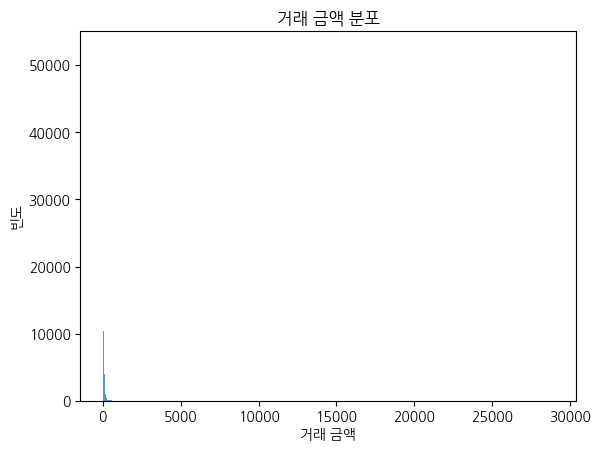

In [25]:
# 수치형 데이터 탐색: histogram(수치형 변수의 분포와 이상치 확인)

sns.histplot(df['amt'])
plt.xlabel('거래 금액')
plt.ylabel('빈도')
plt.title('거래 금액 분포')
plt.show()

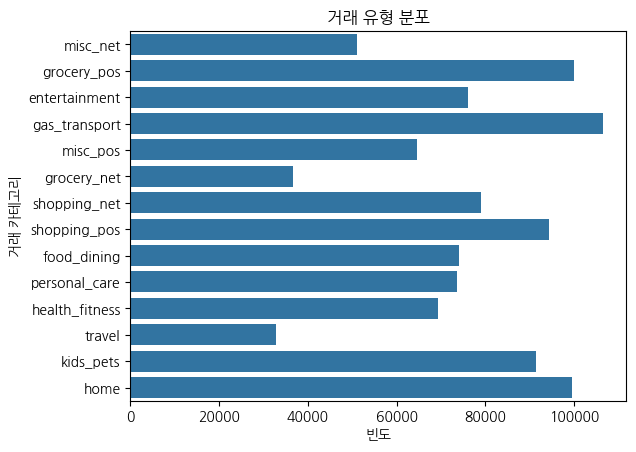

In [26]:
# 범주형 데이터 탐색: countplot - 거래 카테고리

sns.countplot(df['category'])
plt.xlabel('빈도')
plt.ylabel('거래 카테고리')
plt.title('거래 유형 분포')
plt.show()

In [27]:
# 시계열 데이터 탐색(1)

df['trans_date_trans_time'] = pd.to_datetime(df['trans_date_trans_time'])
df.set_index('trans_date_trans_time', inplace = True)

In [28]:
df

,merchant,category,amt,first,last,city,lat,long,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second,weekday,weekend
trans_date_trans_time,,,,,,,,,,,,,,,,,,,
2019-01-01 00:00:00,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,Moravian Falls,36.0788,-81.1781,36.011293,-82.048315,0,2019,1,1,0,0,0,1,0
2019-01-01 00:00:00,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,Orient,48.8878,-118.2105,49.159047,-118.186462,0,2019,1,1,0,0,0,1,0
2019-01-01 00:00:00,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,Malad City,42.1808,-112.2620,43.150704,-112.154481,0,2019,1,1,0,0,0,1,0
2019-01-01 00:01:00,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,Boulder,46.2306,-112.1138,47.034331,-112.561071,0,2019,1,1,0,1,0,1,0
2019-01-01 00:03:00,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,Doe Hill,38.4207,-79.4629,38.674999,-78.632459,0,2019,1,1,0,3,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-10 16:07:00,fraud_Fadel Inc,health_fitness,77.00,Haley,Wagner,Annapolis,39.0305,-76.5515,38.779464,-76.317042,0,2020,3,10,16,7,0,1,0
2020-03-10 16:07:00,"fraud_Cremin, Hamill and Reichel",misc_pos,116.94,Meredith,Campbell,Hedrick,41.1826,-92.3097,41.400318,-92.726724,0,2020,3,10,16,7,0,1,0
2020-03-10 16:08:00,"fraud_O'Connell, Botsford and Hand",home,21.27,Susan,Mills,Louisville,38.2507,-85.7476,37.293339,-84.798122,0,2020,3,10,16,8,0,1,0


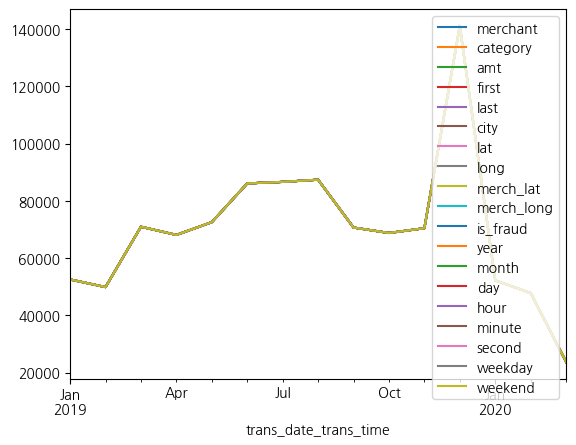

In [29]:
# 시계열 데이터 탐색

df.resample('M').count().plot()
plt.show()

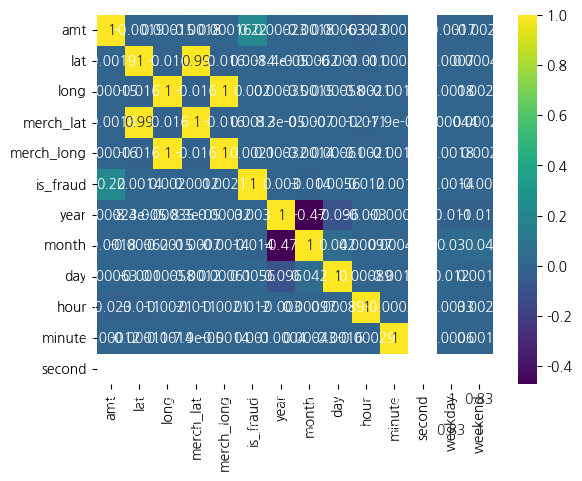

In [30]:
# 상관 분석

numeric_df = df.select_dtypes(include=['number'])

sns.heatmap(numeric_df.corr(), annot=True, cmap='viridis')
plt.ylim(12, 0)
plt.show()

# 데이터 전처리

#### 결측치 처리

In [31]:
# 컬럼별 결측치 개수 확인

df.isnull().sum()

,0
merchant,0
category,0
amt,0
first,0
last,0
city,0
lat,0
long,0
merch_lat,0
merch_long,0


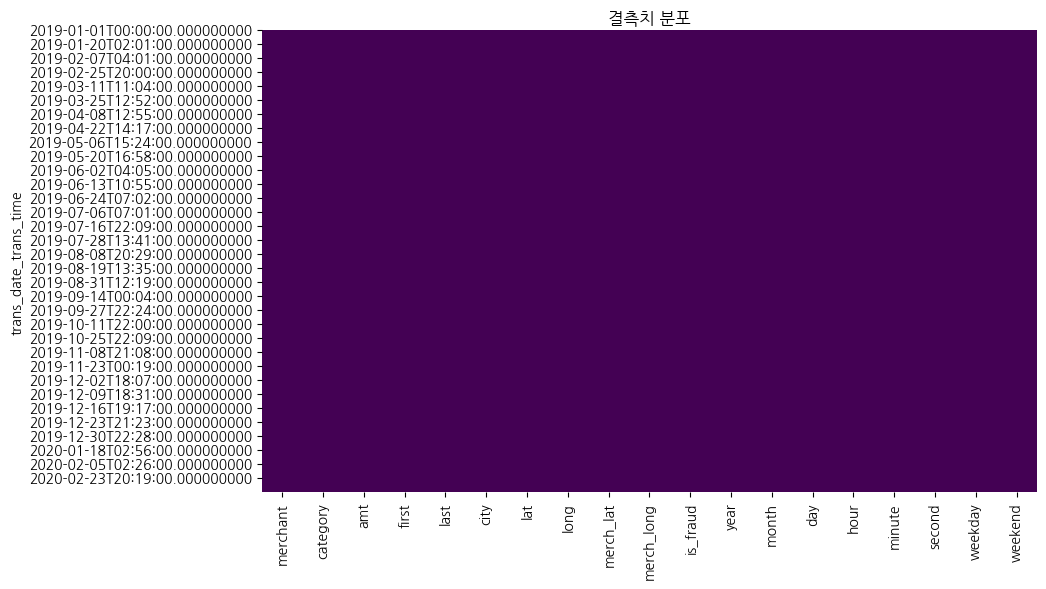

In [32]:
# 결측치 분포 시각화

plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('결측치 분포')
plt.show()

In [33]:
df[df.isna().any(axis = 1)]

,merchant,category,amt,first,last,city,lat,long,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,second,weekday,weekend
trans_date_trans_time,,,,,,,,,,,,,,,,,,,


In [ ]:
# 결측치 제거

df.dropna(inplace=True)

In [ ]:
# 결측치 없음

In [ ]:
# 거래 금액 데이터 정수형 변환

df['amt'] = df['amt'].astype(int)

In [ ]:
df

#### 이상치 처리

#### 데이터 정규화 및 스케일링

#### 범주형 변수 처리

#### 날짜 및 시간 데이터 처리

#### 파생 변수 생성

# 데이터 분할 및 샘플링

#### 거래 카테고리 vs 거래 금액

#### 거래 금액

# 데이터 변환 및 인코딩

# 최종 데이터셋 준비 및 확인